In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


<div style="
            color:white;
           display:fill;
           border-radius:10px;
           background-color:#59b7fd;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
 
<h1 style="padding: 30px;
              color:black;">Library</h1>

</div>

Library that I use on this Notebook

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<div style="
            color:white;
           display:fill;
           border-radius:10px;
           background-color:#59b7fd;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
 
<h1 style="padding: 30px;
              color:black;">Explore Data - Data Detail</h1>

</div>

Analysis on detail data:
* info
* null
* object/numerical column

In [3]:
data_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
del_col = []
num_col = []
for i in data_df.columns:
    if(data_df[i].dtypes == "object"):
        del_col.append(i)
    else:
        num_col.append(i)

        
        
#data['Gender'].value_counts()
#data['Remarks'].value_counts()


In [7]:
eda_data = data_df.drop(del_col,axis=1)
eda_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

<AxesSubplot:>

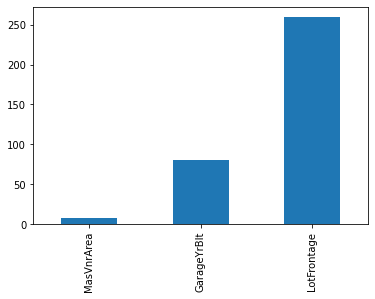

In [9]:
missing = eda_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<div style="
            color:white;
           display:fill;
           border-radius:10px;
           background-color:#59b7fd;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
 
<h1 style="padding: 30px;
              color:black;">Explore Data - Plot</h1>

</div>

In this section is to understand or gain insight on the data by using plot.

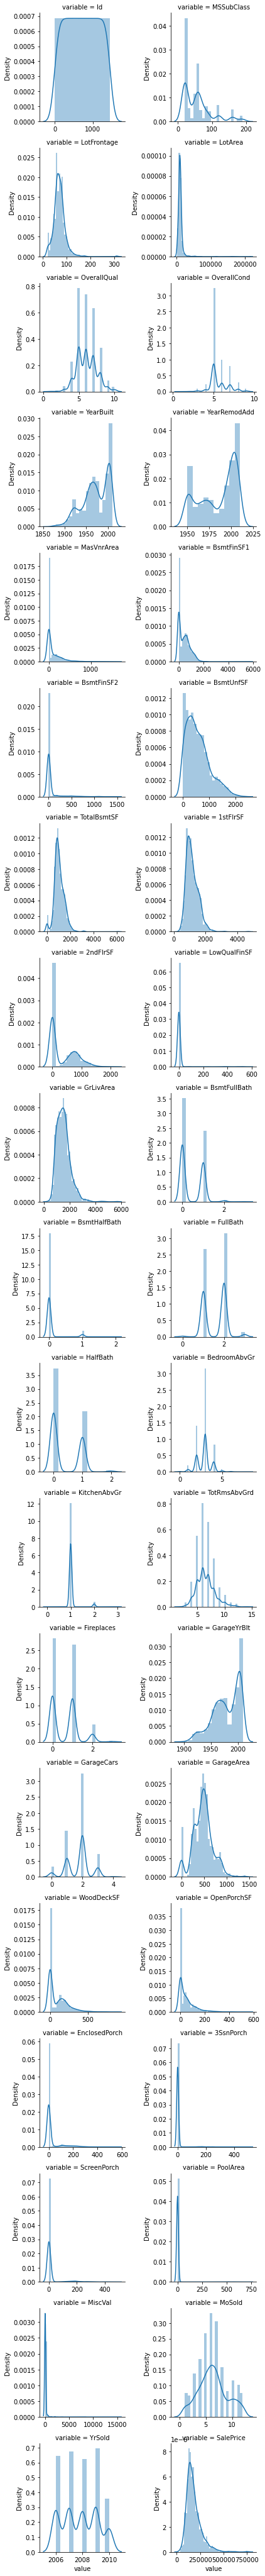

In [10]:
f = pd.melt(eda_data, value_vars=num_col)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [11]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'value': x, 'price': y})
    ts = ts.groupby('value').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)

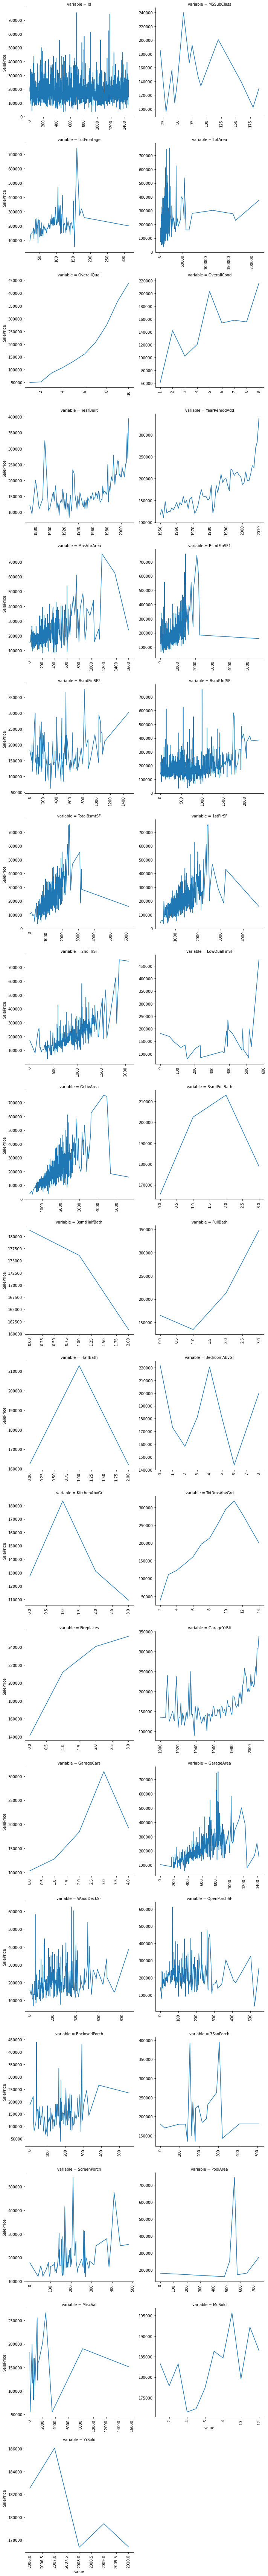

In [12]:
f = pd.melt(eda_data, id_vars=['SalePrice'], value_vars=num_col)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")


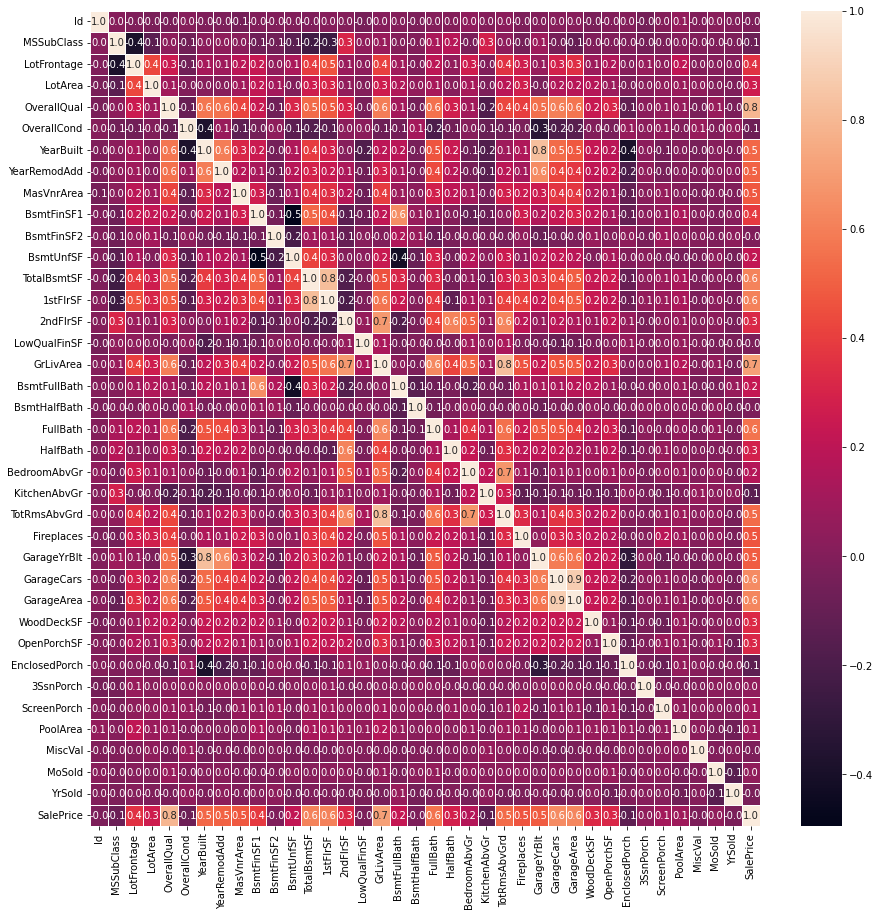

In [13]:
#sns.heatmap(eda_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(eda_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [14]:
print()
corr_list = []
corr_cols = []
#data['A'].corr(data['B'])
for i in eda_data.columns:
    if i != "SalePrice" and i != "Id":
        corr_col = eda_data['SalePrice'].corr(eda_data[i])
        #if(corr_col < 0):
        #    continue
        corr_cols.append(i)
        corr_list.append(corr_col)
        
print(corr_cols)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [15]:
corr_df = pd.DataFrame([corr_cols,corr_list],index=['figure','coor value']).T

In [16]:
corr_df = corr_df.sort_values(by=['coor value'])
corr_df.head()

,figure,coor value
21,KitchenAbvGr,-0.135907
29,EnclosedPorch,-0.128578
0,MSSubClass,-0.084284
4,OverallCond,-0.077856
35,YrSold,-0.028923


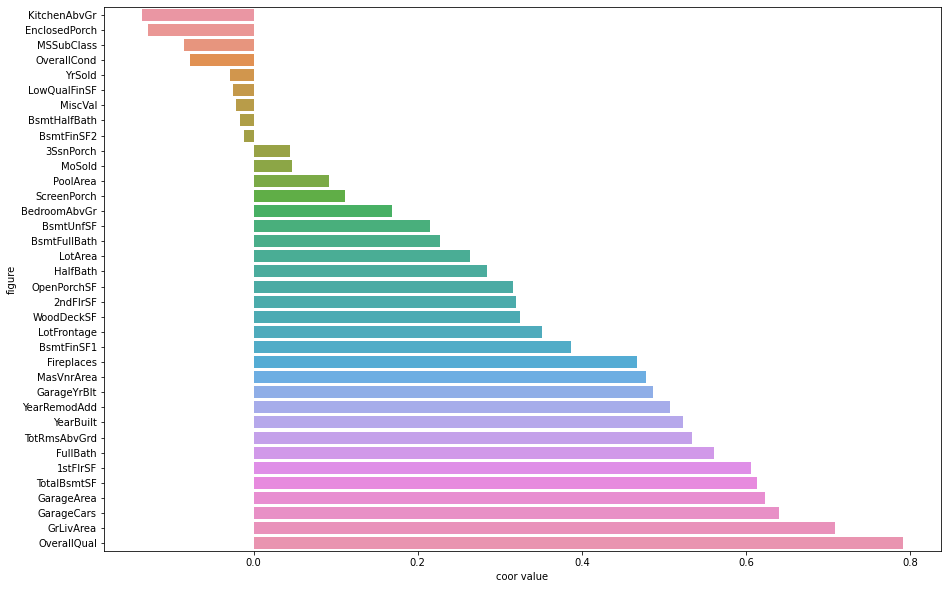

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(data=corr_df, y='figure', x='coor value')
#plt.xticks(rotation=90)
#sns.countplot(corr_df['figure'])
#plt.title("Correlation Figure with SalePrice",fontsize=15)
plt.show()

<div style="
            color:white;
           display:fill;
           border-radius:10px;
           background-color:#59b7fd;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
 
<h1 style="padding: 30px;
              color:black;">Explore Data - Categorical Analysis</h1>

</div>

In this section we will learn about categorical data in this data set, maybe from this we can gain insight what column data will be useful for creating model.

In [18]:
clean_data = data_df.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis=1)

In [19]:

for i in clean_data.columns:
    if(clean_data[i].dtypes == "object"):
        print(i,":")
        print(clean_data[i].value_counts())

        
#data['Gender'].value_counts()
#data['Remarks'].value_counts()

MSZoning :
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street :
Pave    1454
Grvl       6
Name: Street, dtype: int64
LotShape :
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour :
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities :
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig :
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope :
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood :
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill 

## Choose column that will be useful

<div class="alert alert-block alert-info"> 📌 Please note that this column is what I think will be useful for modeling, you can edit it for yourself.</div>

In [20]:
obj_col = ['MSZoning','Street','HouseStyle','Heating','PavedDrive']
del_col = []
for i in clean_data.columns:
    if(i not in obj_col and clean_data[i].dtypes == "object"):
        del_col.append(i)
       
print(del_col)

['LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']


In [21]:
new_data = clean_data.drop(del_col,axis=1)

In [22]:
one_hot_encoded_data = pd.get_dummies(new_data, columns = obj_col)
one_hot_encoded_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,HouseStyle_SLvl,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,1,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,1,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,1,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,1,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,1,0,0,0,0,0,0,1


In [23]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   int64  
 2   LotFrontage        1201 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   OverallQual        1460 non-null   int64  
 5   OverallCond        1460 non-null   int64  
 6   YearBuilt          1460 non-null   int64  
 7   YearRemodAdd       1460 non-null   int64  
 8   MasVnrArea         1452 non-null   float64
 9   BsmtFinSF1         1460 non-null   int64  
 10  BsmtFinSF2         1460 non-null   int64  
 11  BsmtUnfSF          1460 non-null   int64  
 12  TotalBsmtSF        1460 non-null   int64  
 13  1stFlrSF           1460 non-null   int64  
 14  2ndFlrSF           1460 non-null   int64  
 15  LowQualFinSF       1460 non-null   int64  
 16  GrLivArea          1460 

<div class="alert alert-block alert-info"> 📌 Please visit my github if you interested in modeling section of this data set
https://github.com/alrizkipascar/House-Prices-Advanced-Regression-Techniques</div>
